# 实验: 逻辑回归和随机梯度下降

## 1. 读取实验数据，划分训练集合验证集

In [1]:
import sklearn
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *

mem = Memory("./mycache")

@mem.cache
def getData():
    train_X, train_y = load_svmlight_file('data/a9a', n_features=123)
    test_X, test_y = load_svmlight_file('data/a9a.t', n_features=123)

    train_y =  train_y.reshape(train_y.shape[0],1)
    test_y =  test_y.reshape(test_y.shape[0],1)

    train_y[train_y == -1] = 0
    test_y[test_y == -1] = 0
    return train_X, test_X, train_y, test_y

train_X, test_X, train_y, test_y = getData()


## 2.初始化模型参数

In [2]:
import numpy as np
m, n = np.shape(train_X)
theta = np.ones((n, 1))
alpha = 0.03
maxIteration = 500


## 3.选择Loss函数

In [3]:
def getLoss(x,y,theta):
    return  -( y * log(sigmoid(x * theta)) + (1 - y) * log(1 - sigmoid(x * theta)) ).sum() / x.shape[0]

def sigmoid(a):
    return 1 / (1 + np.exp(-a))


## 4.随机梯度下降函数训练

In [6]:
def getGradientSGD(w):
    random_num = np.random.randint(0,m)
    return (train_X[random_num].T * (sigmoid(train_X[random_num] * w) - train_y[random_num]))

train_loss = []
evaluation_loss = []

def SGD(theta):
    for i in range(0, maxIteration):
        gradient = getGradientSGD(theta)
        theta = theta - alpha * gradient 
        
        train_loss.append(getLoss(train_X,train_y,theta))
        evaluation_loss.append(getLoss(test_X,test_y,theta))

SGD(theta)
print(min(evaluation_loss))

0.482568160775


## 5.绘制Loss train和Loss validation随迭代次数的变化图

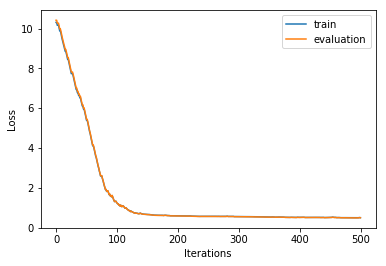

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss, label="train")
plt.plot(evaluation_loss,label="evaluation" )
plt.legend(loc ='upper right')


## 6.使用不同的优化方法更新模型参数

### NAG

In [9]:
train_loss_nag,evaluation_loss_nag,train_accr_nag,evaluation_accr_nag = [],[],[],[]
theta = np.ones((n, 1))

def NAG(theta):
    gama = 0.9
    vt = 0

    for i in range(0, maxIteration):
        gradient = getGradientSGD(theta - gama*vt)
        vt = gama*vt + alpha * gradient
        theta = theta - vt

        train_loss_nag.append(getLoss(train_X,train_y,theta))
        evaluation_loss_nag.append(getLoss(test_X,test_y,theta))
        
NAG(theta)
print(min(evaluation_loss_nag))

0.421152838615


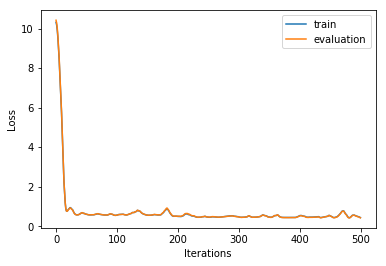

In [10]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_nag, label="train")
plt.plot(evaluation_loss_nag,label="evaluation" )
plt.legend(loc ='upper right')

 ### RMSProp

In [12]:
train_loss_RMSProp,evaluation_loss_RMSProp,train_accr_RMSProp,evaluation_accr_RMSProp = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(theta):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    
    learning_rate = 0.3

    for i in range(0, maxIteration):
        gradient = getGradientSGD(theta - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        theta = theta - learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_RMSProp.append(getLoss(train_X,train_y,theta))
        evaluation_loss_RMSProp.append(getLoss(test_X,test_y,theta))
        
RMSProp(theta)
print(min(evaluation_loss_RMSProp))

0.393141604787


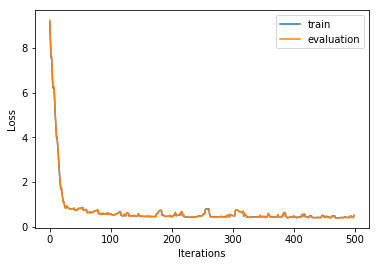

In [13]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_RMSProp, label="train")
plt.plot(evaluation_loss_RMSProp,label="evaluation" )
plt.legend(loc ='upper right')

### AdaDelta

In [15]:
train_loss_adaDelta,evaluation_loss_adaDelta,train_accr_adaDelta,evaluation_accr_adaDelta = [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(theta):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000

    for i in range(0, maxIteration):
        
        gradient = getGradientSGD(theta)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        theta = theta + learning_rate*delta 
        
        train_loss_adaDelta.append(getLoss(train_X,train_y,theta))
        evaluation_loss_adaDelta.append(getLoss(test_X,test_y,theta))
        
adaDelta(theta)
print(min(evaluation_loss_adaDelta))

0.409958241997


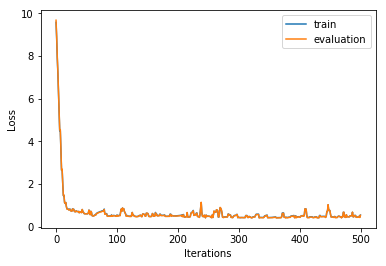

In [16]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_adaDelta, label="train")
plt.plot(evaluation_loss_adaDelta,label="evaluation" )
plt.legend(loc ='upper right')


### Adam

In [17]:
train_loss_adam,evaluation_loss_adam,train_accr_adam,evaluation_accr_adam = [],[],[],[]
theta = np.ones((n, 1))

def adam(theta):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    
    for i in range(0, maxIteration):
        
        gradient = getGradientSGD(theta)
        t +=1 
        m = b1 * m + ((1 - b1) * gradient).sum() 
        v = b2 * v + ((1 - b2) * (gradient ** 2)).sum()  
        mt = m / (1 - (b1 ** t))  
        vt = v / (1 - (b2 ** t)) 
        theta = theta- learning_rate * mt / (math.sqrt(vt) + e) 
        
        train_loss_adam.append(getLoss(train_X,train_y,theta))
        evaluation_loss_adam.append(getLoss(test_X,test_y,theta))
        
adam(theta)
print(min(evaluation_loss_adam))

0.548395087657


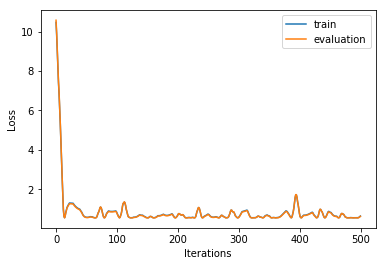

In [13]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_adam, label="train")
plt.plot(evaluation_loss_adam,label="evaluation" )
plt.legend(loc ='upper right')

## 五种不同随机梯度下降方法对比

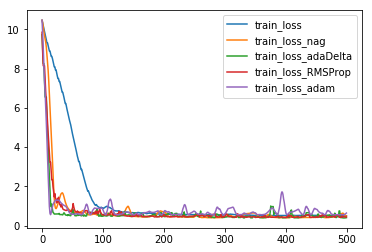

In [14]:

plt.plot(train_loss, label="train_loss")
plt.plot(train_loss_nag, label="train_loss_nag")
plt.plot(train_loss_adaDelta, label="train_loss_adaDelta")
plt.plot(train_loss_RMSProp, label ="train_loss_RMSProp")
plt.plot(train_loss_adam, label="train_loss_adam")
plt.legend(loc="upper right")
